<a href="https://colab.research.google.com/github/Bia-byte/Lista-1/blob/main/gerador_FSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequência de bits: [0 1 1 0 1 1 1 1 1 1]


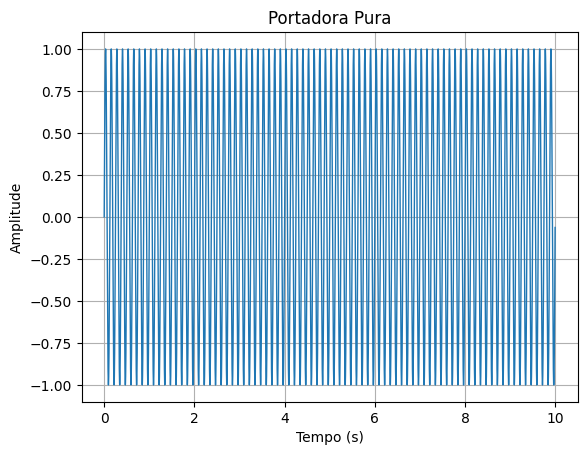

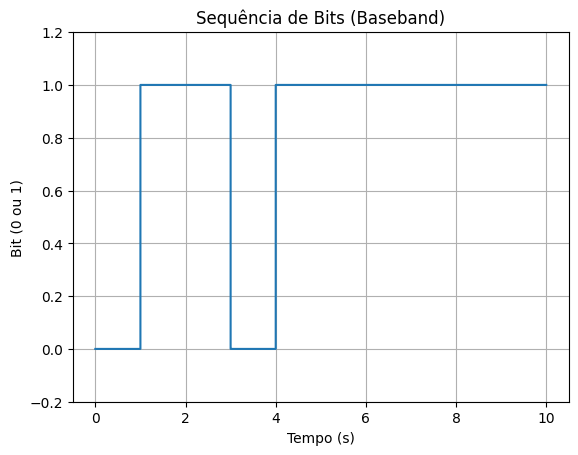

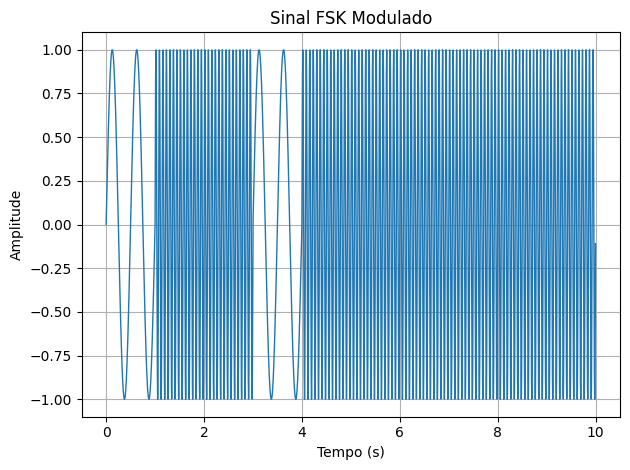

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
num_bits        = 10      # número de bits
bit_rate        = 1       # 1 bit por segundo, cada símbolo dura 1 s
f_carrier       = 8.0     # portadora a 8 Hz
f_dev           = 6.0     # desvio ±6 Hz → f0=2 Hz, f1=14 Hz
samples_per_bit = 800     # mais amostras para suavizar

# Gera sequência de bits
np.random.seed(0)
bit_seq = np.random.randint(0, 2, num_bits)
print("Sequência de bits:", bit_seq)

# Preparação do tempo e frequências
bit_duration = 1.0 / bit_rate
t_bit = np.linspace(0, bit_duration, samples_per_bit, endpoint=False)
total_samples = samples_per_bit * num_bits
f1 = f_carrier + f_dev  # frequência para bit '1'
f0 = f_carrier - f_dev  # frequência para bit '0'

# Prealoca arrays
t = np.zeros(total_samples)
fsk_signal = np.zeros(total_samples)

# Geração do sinal FSK
for i, bit in enumerate(bit_seq):
    start = i * samples_per_bit
    end = start + samples_per_bit
    t[start:end] = t_bit + i * bit_duration
    freq = f1 if bit == 1 else f0
    fsk_signal[start:end] = np.sin(2 * np.pi * freq * t_bit)

# Geração do sinal da portadora pura
carrier = np.sin(2 * np.pi * f_carrier * t)

# Geração da sequência de bits como waveform
data_sequence = np.repeat(bit_seq, samples_per_bit)

# Plot 1: portadora pura
plt.figure(1)
plt.plot(t, carrier, linewidth=1)
plt.title("Portadora Pura")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot 2: sequência de bits
plt.figure(2)
plt.step(t, data_sequence, where='post')
plt.ylim(-0.2, 1.2)
plt.title("Sequência de Bits (Baseband)")
plt.xlabel("Tempo (s)")
plt.ylabel("Bit (0 ou 1)")
plt.grid(True)

# Plot 3: sinal FSK
plt.figure(3)
plt.plot(t, fsk_signal, linewidth=1)
plt.title("Sinal FSK Modulado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()
